[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Integra-o-ordens-de-rea-o/blob/master/Integrando_equa%C3%A7%C3%B5es_diferenciais_e_ajustando_pontos_experimentais_importando_os_dados.ipynb)

**Integrando equações diferenciais e ajuste de pontos experimentais completo**

In [0]:
#Importação todos os pacotes utilizados
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#carregar o arquivo em csv
uploaded = files.upload()

Saving dado_primeira_ordem.csv to dado_primeira_ordem.csv


In [4]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "dado_primeira_ordem.csv" com tamanho de 166 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['dado_primeira_ordem.csv'].decode('utf-8')))

In [6]:
#impressão do arquivo em data frame
calibracao_df

,tempo,concentracao
0,0,20.000000
1,1,9.473684
2,2,6.206896
3,3,4.615384
4,4,3.673469
5,5,3.050847
6,6,2.608696
7,7,2.278481
8,8,2.022472
9,9,2.000000


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [8]:
#impressão do vetor
calibracao_np

array([[ 0.        , 20.        ],
       [ 1.        ,  9.47368413],
       [ 2.        ,  6.20689638],
       [ 3.        ,  4.61538443],
       [ 4.        ,  3.67346922],
       [ 5.        ,  3.0508473 ],
       [ 6.        ,  2.60869551],
       [ 7.        ,  2.27848088],
       [ 8.        ,  2.02247179],
       [ 9.        ,  1.99999988],
       [10.        ,  1.81818171]])

In [9]:
#vetor do eixo x
t = calibracao_np[:,0]
print(t)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [10]:
#vetor do eixo y
data_ca = calibracao_np[:,1]
print(data_ca)

[20.          9.47368413  6.20689638  4.61538443  3.67346922  3.0508473
  2.60869551  2.27848088  2.02247179  1.99999988  1.81818171]


In [0]:
def secondorder(Ca,t, k):
  return -k*Ca**2

In [0]:
def y(t, k, Ca0):
  y = odeint(secondorder, Ca0, t, args=(k,))
  return y.ravel()

In [13]:
popt, cov = curve_fit(y, t, data_ca, [20, 1])
a_opt, y0_opt = popt
print(y)

<function y at 0x7fbc036b0050>


/usr/local/lib/python2.7/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
print("a = %g" % a_opt)
print("y0 = %g" % y0_opt)

a = 0.055199
y0 = 19.9904


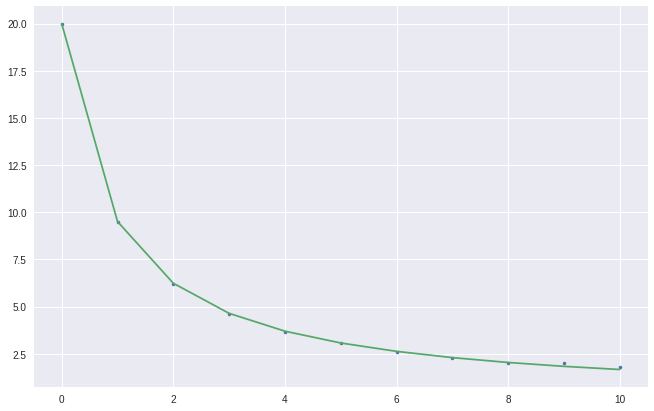

In [17]:
import matplotlib.pyplot as plt
plt.plot(t, data_ca, '.',
         t, y(t, a_opt, y0_opt), '-')
plt.gcf().set_size_inches(11, 7)
plt.savefig('out.png', dpi=96)
plt.show()


In [18]:
y = odeint(secondorder, y0_opt, t, args=(a_opt,))
#guardando as informações e salvando em txt
data = np.vstack((t, y.T))
data = data.T
print(data)

[[ 0.         19.99037909]
 [ 1.          9.50361997]
 [ 2.          6.23355648]
 [ 3.          4.63776576]
 [ 4.          3.69248854]
 [ 5.          3.06730523]
 [ 6.          2.6231705 ]
 [ 7.          2.29138605]
 [ 8.          2.0341076 ]
 [ 9.          1.8287718 ]
 [10.          1.66109071]]


In [19]:
#salvando em csv
df = pd.DataFrame(data)
df.to_csv("data.csv")
files.download('data.csv')
print(df)

       0          1
0    0.0  19.990379
1    1.0   9.503620
2    2.0   6.233556
3    3.0   4.637766
4    4.0   3.692489
5    5.0   3.067305
6    6.0   2.623170
7    7.0   2.291386
8    8.0   2.034108
9    9.0   1.828772
10  10.0   1.661091
